# HANNING (kode setelah bimbingan)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/HANNING.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.000782,0.000756,0.000241,0.000352,0.001678,0.000133,0.000238,0.000647,0.000334,0.000693,...,0.000513,0.000014,0.000870,0.000256,0.000245,0.000865,6.405581e-04,0.000043,kejang,0.000000
1,0.000791,0.000756,0.000256,0.000372,0.001686,0.000136,0.000259,0.000664,0.000329,0.000707,...,0.000453,0.000036,0.000879,0.000256,0.000259,0.000898,6.308364e-04,0.000033,kejang,0.025000
2,0.000760,0.000750,0.000265,0.000373,0.001661,0.000128,0.000266,0.000673,0.000347,0.000718,...,0.000546,0.000069,0.000896,0.000265,0.000256,0.000885,6.329942e-04,0.000025,kejang,0.050000
3,0.000754,0.000751,0.000249,0.000359,0.001648,0.000135,0.000253,0.000658,0.000355,0.000700,...,0.000563,0.000076,0.000868,0.000249,0.000238,0.000848,6.962496e-04,0.000044,kejang,0.075000
4,0.000824,0.000777,0.000249,0.000375,0.001711,0.000161,0.000258,0.000670,0.000341,0.000692,...,0.000456,0.000113,0.000884,0.000249,0.000260,0.000880,6.893149e-04,0.000046,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398507e-05,0.000054,tidak kejang,127.926471
2807036,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291731e-07,0.000036,tidak kejang,127.941176
2807037,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398505e-05,0.000054,tidak kejang,127.955882
2807038,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291713e-07,0.000036,tidak kejang,127.970588


In [ ]:
# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)  # "kejang" -> 1, "tidak kejang" -> 0

In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model/buat model dasar
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'max_depth': [5, 10, 20],
}


In [ ]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'mcc': 'matthews_corrcoef',
    'balanced_acc': 'balanced_accuracy',
    'logloss': 'neg_log_loss',
    'roc_auc': 'roc_auc'
}

In [ ]:
# GridSearchCV
grid_search = GridSearchCV(
    rf,
    param_grid=param_grid,
    scoring=scoring,
    cv=skf,
    refit='accuracy',   # pilih satu metrik untuk refit
    n_jobs=-1,
    return_train_score=True
)

In [ ]:
# Fit
grid_search.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20]}, refit='accuracy',
             return_train_score=True,
             scoring={'accuracy': 'accuracy',
                      'balanced_acc': 'balanced_accuracy', 'f1': 'f1',
                      'logloss': 'neg_log_loss', 'mcc': 'matthews_corrcoef',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
resultss = results.T
print(resultss)

                               0            1            2
mean_fit_time         1154.73925  2052.845932  3190.205077
std_fit_time           18.528843    33.465381   112.806644
mean_score_time         3.344758     6.956778    18.521421
std_score_time          0.171385     0.527538     2.442515
param_max_depth                5           10           20
...                          ...          ...          ...
split2_train_roc_auc    0.741617     0.913834     0.974208
split3_train_roc_auc    0.739748     0.914608     0.975227
split4_train_roc_auc    0.739769     0.913475     0.974889
mean_train_roc_auc      0.739512     0.913303     0.975005
std_train_roc_auc        0.00138     0.001046     0.000442

[126 rows x 3 columns]


In [ ]:
resultss.to_csv('results banyak hanning.csv')

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)[
    ['params', 'mean_test_accuracy', 'mean_test_precision',
     'mean_test_recall', 'mean_test_f1', 'mean_test_mcc', 'mean_test_balanced_acc',
     'mean_test_logloss', 'mean_test_roc_auc']
]
results

,params,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_mcc,mean_test_balanced_acc,mean_test_logloss,mean_test_roc_auc
0,{'max_depth': 5},0.658602,0.622634,0.805263,0.702269,0.331799,0.658602,-0.618615,0.739159
1,{'max_depth': 10},0.798255,0.730362,0.945636,0.824172,0.624246,0.798255,-0.483120,0.911701
2,{'max_depth': 20},0.868257,0.821684,0.940658,0.877152,0.744366,0.868257,-0.271823,0.958528


In [ ]:
# Hasil
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 20}
Best Score: 0.868257132416398



📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

           0     0.9344    0.7920    0.8573    280704
           1     0.8195    0.9444    0.8775    280704

    accuracy                         0.8682    561408
   macro avg     0.8769    0.8682    0.8674    561408
weighted avg     0.8769    0.8682    0.8674    561408



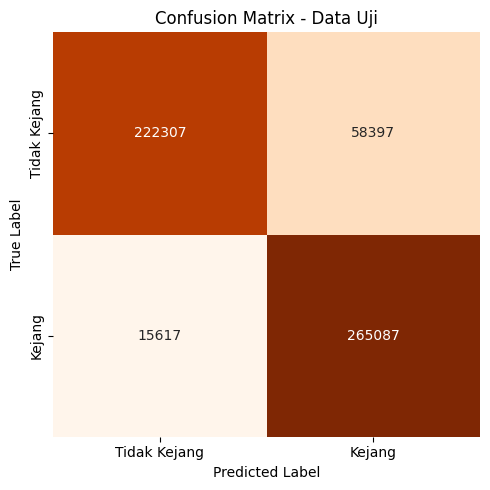

In [ ]:
#pediksi data test
y_test_pred = grid_search.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================

cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

           0     0.9761    0.8146    0.8881   1122816
           1     0.8409    0.9801    0.9052   1122816

    accuracy                         0.8973   2245632
   macro avg     0.9085    0.8973    0.8966   2245632
weighted avg     0.9085    0.8973    0.8966   2245632



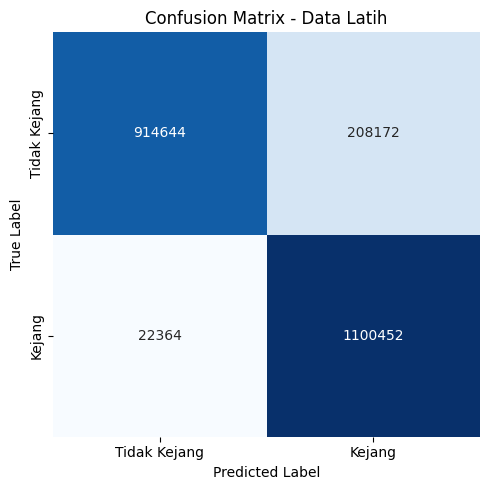

In [ ]:
# Prediksi data latih
y_train_pred = grid_search.predict(X_train) #menghasilakn label prediksi dari fitur

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4)) # mengevaluasi seberapa baik prediksi dibanding label asli


# ====================
# Confusion Matrix - Data Latih
# ====================

cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📊 Feature Importance:
     Feature  Importance
0     FP1-F7    0.052614
6      C3-P3    0.052480
8     FP2-F4    0.051692
16     FZ-CZ    0.051099
3      P7-O1    0.048550
7      P3-O1    0.047802
19    T7-FT9    0.046867
20  FT9-FT10    0.045145
10     C4-P4    0.045072
17     CZ-PZ    0.044658
11     P4-O2    0.043958
9      F4-C4    0.043941
1      F7-T7    0.043716
4     FP1-F3    0.043507
12    FP2-F8    0.042760
18     P7-T7    0.040159
2      T7-P7    0.039874
15     P8-O2    0.039575
21   FT10-T8    0.038329
5      F3-C3    0.037696
13     F8-T8    0.036410
14   T8-P8-0    0.033567
22   T8-P8-1    0.030530


/tmp/ipython-input-2869360155.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')


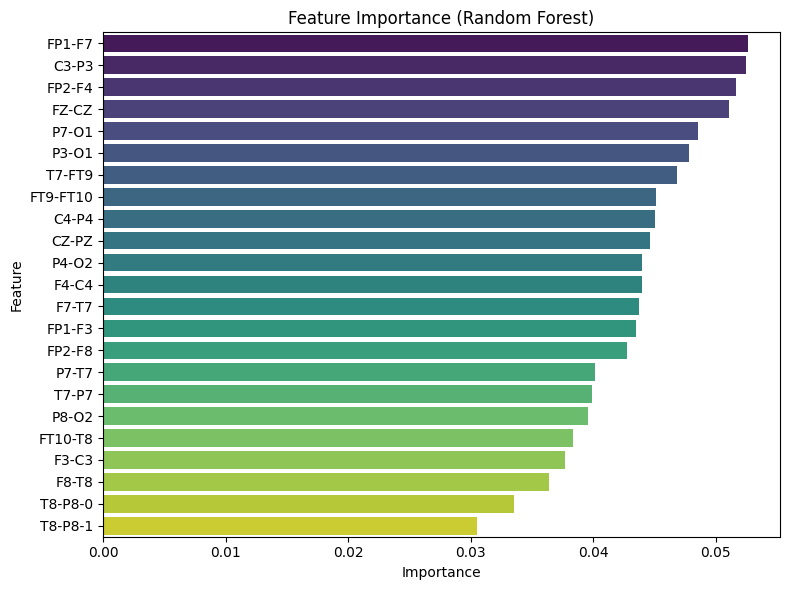

In [ ]:

# ====================
# 5. Feature Importance
# ====================
best_rf = grid_search.best_estimator_   # model terbaik hasil GridSearchCV
importances = best_rf.feature_importances_
feature_names = X.columns

# Buat DataFrame
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n📊 Feature Importance:")
print(feat_imp)

# Visualisasi Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

# RECTANGULAR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/RECTANGULAR.csv")
mydata

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.001195,0.001793,0.000520,0.002409,0.001823,0.000805,0.000324,0.002341,0.001412,0.001758,...,1.207848e-03,0.001434,0.000743,0.000138,0.002514,0.001700,0.001067,0.000021,kejang,0.000000
1,0.000789,0.001850,0.000158,0.001468,0.001465,0.000763,0.000932,0.001564,0.001669,0.002435,...,1.892523e-03,0.001060,0.001257,0.000158,0.001869,0.000235,0.000710,0.000489,kejang,0.025000
2,0.002511,0.002253,0.000593,0.001467,0.003102,0.001204,0.000956,0.001171,0.000879,0.002853,...,3.548574e-03,0.000514,0.001964,0.000593,0.002037,0.000762,0.000705,0.001039,kejang,0.050000
3,0.003001,0.002348,0.001485,0.002485,0.004089,0.001443,0.000193,0.003235,0.001785,0.001719,...,1.484849e-02,0.001865,0.000861,0.001485,0.003279,0.003552,0.005105,0.000635,kejang,0.075000
4,0.001659,0.000911,0.001210,0.002071,0.000594,0.001194,0.000688,0.003625,0.001718,0.000732,...,7.476052e-03,0.001834,0.001406,0.001210,0.002151,0.005696,0.004143,0.001791,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000061,0.000052,0.000018,0.000045,0.000042,0.000269,0.000277,0.000021,0.000050,0.000046,...,9.350920e-07,0.000027,0.000042,0.000018,0.000012,0.000184,0.000156,0.000063,tidak kejang,127.926471
2807036,0.000010,0.000024,0.000038,0.000010,0.000102,0.000322,0.000254,0.000002,0.000056,0.000010,...,1.400107e-05,0.000017,0.000039,0.000038,0.000033,0.000078,0.000116,0.000042,tidak kejang,127.941176
2807037,0.000061,0.000052,0.000018,0.000045,0.000042,0.000269,0.000277,0.000021,0.000050,0.000046,...,9.372227e-07,0.000027,0.000042,0.000018,0.000012,0.000184,0.000156,0.000063,tidak kejang,127.955882
2807038,0.000010,0.000024,0.000038,0.000010,0.000102,0.000322,0.000254,0.000002,0.000056,0.000010,...,1.399952e-05,0.000017,0.000039,0.000039,0.000033,0.000078,0.000116,0.000042,tidak kejang,127.970588


In [ ]:
# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']

In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model/buat model dasar
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 20],
}

# Grid Search CV dengan cv=5/pencarian parameter
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model/cross validation/pembentukan pohon
search_model = grid_search.fit(X_train, y_train)


In [ ]:
search_model.best_params_

{'max_depth': 20, 'n_estimators': 100}

In [ ]:
search_model.best_score_

np.float64(0.8570682991196372)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9721    0.8005    0.8780   1122816
tidak kejang     0.8305    0.9771    0.8978   1122816

    accuracy                         0.8888   2245632
   macro avg     0.9013    0.8888    0.8879   2245632
weighted avg     0.9013    0.8888    0.8879   2245632



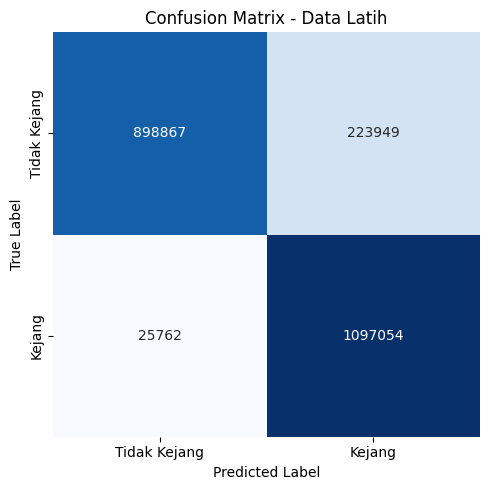

In [ ]:
# Prediksi data latih
y_train_pred = search_model.predict(X_train) #menghasilakn label prediksi dari fitur

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4)) # mengevaluasi seberapa baik prediksi dibanding label asli


# ====================
# Confusion Matrix - Data Latih
# ====================

cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9278    0.7748    0.8444    280704
tidak kejang     0.8067    0.9397    0.8681    280704

    accuracy                         0.8573    561408
   macro avg     0.8673    0.8573    0.8563    561408
weighted avg     0.8673    0.8573    0.8563    561408



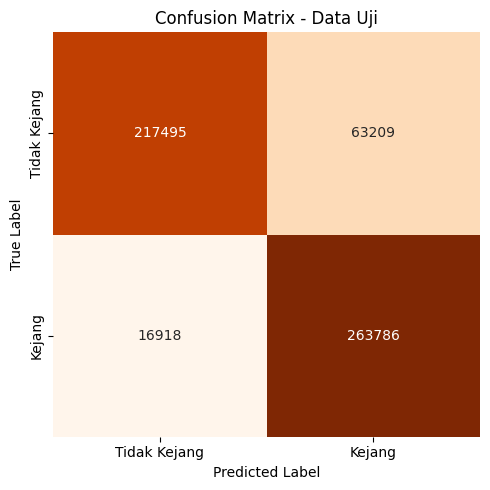

In [ ]:
#pediksi data test
y_test_pred = search_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================

cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# HANNING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/HANNING.csv")
mydata

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.000782,0.000756,0.000241,0.000352,0.001678,0.000133,0.000238,0.000647,0.000334,0.000693,...,0.000513,0.000014,0.000870,0.000256,0.000245,0.000865,6.405581e-04,0.000043,kejang,0.000000
1,0.000791,0.000756,0.000256,0.000372,0.001686,0.000136,0.000259,0.000664,0.000329,0.000707,...,0.000453,0.000036,0.000879,0.000256,0.000259,0.000898,6.308364e-04,0.000033,kejang,0.025000
2,0.000760,0.000750,0.000265,0.000373,0.001661,0.000128,0.000266,0.000673,0.000347,0.000718,...,0.000546,0.000069,0.000896,0.000265,0.000256,0.000885,6.329942e-04,0.000025,kejang,0.050000
3,0.000754,0.000751,0.000249,0.000359,0.001648,0.000135,0.000253,0.000658,0.000355,0.000700,...,0.000563,0.000076,0.000868,0.000249,0.000238,0.000848,6.962496e-04,0.000044,kejang,0.075000
4,0.000824,0.000777,0.000249,0.000375,0.001711,0.000161,0.000258,0.000670,0.000341,0.000692,...,0.000456,0.000113,0.000884,0.000249,0.000260,0.000880,6.893149e-04,0.000046,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398507e-05,0.000054,tidak kejang,127.926471
2807036,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291731e-07,0.000036,tidak kejang,127.941176
2807037,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398505e-05,0.000054,tidak kejang,127.955882
2807038,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291713e-07,0.000036,tidak kejang,127.970588


In [ ]:
# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']

In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model/buat model dasar
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 20],
}

# Grid Search CV dengan cv=5/pencarian parameter
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model/cross validation/pembentukan pohon
search_model = grid_search.fit(X_train, y_train)


In [ ]:
search_model.best_params_

{'max_depth': 20, 'n_estimators': 100}

In [ ]:
search_model.best_score_

np.float64(0.868257132416398)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9761    0.8146    0.8881   1122816
tidak kejang     0.8409    0.9801    0.9052   1122816

    accuracy                         0.8973   2245632
   macro avg     0.9085    0.8973    0.8966   2245632
weighted avg     0.9085    0.8973    0.8966   2245632



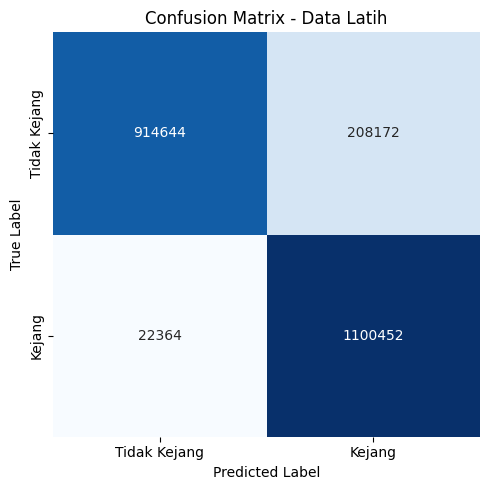

In [ ]:
# Prediksi data latih
y_train_pred = search_model.predict(X_train) #menghasilakn label prediksi dari fitur

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4)) # mengevaluasi seberapa baik prediksi dibanding label asli


# ====================
# Confusion Matrix - Data Latih
# ====================

cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9344    0.7920    0.8573    280704
tidak kejang     0.8195    0.9444    0.8775    280704

    accuracy                         0.8682    561408
   macro avg     0.8769    0.8682    0.8674    561408
weighted avg     0.8769    0.8682    0.8674    561408



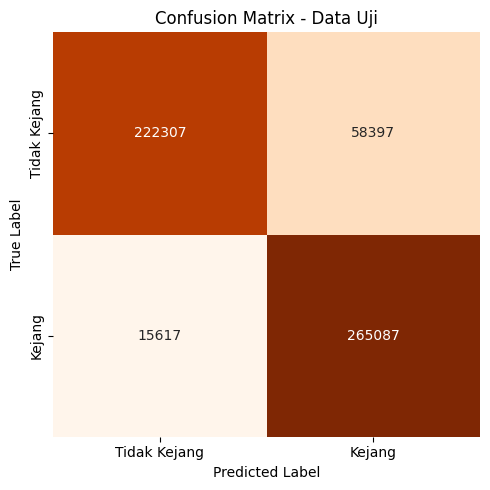

In [ ]:
#pediksi data test
y_test_pred = search_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================

cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# HAMMING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/HAMMING.csv")
mydata

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.001885,0.000044,0.000865,0.000275,0.000536,0.001876,0.000260,0.001489,1.273264e-03,0.001175,...,0.000260,0.001671,0.000502,0.000861,0.000364,0.000387,0.000319,0.000614,kejang,0.000000
1,0.001883,0.000049,0.000861,0.000270,0.000535,0.001876,0.000255,0.001486,1.271879e-03,0.001179,...,0.000243,0.001673,0.000500,0.000861,0.000367,0.000380,0.000322,0.000611,kejang,0.025000
2,0.001894,0.000061,0.000861,0.000272,0.000546,0.001880,0.000254,0.001487,1.276849e-03,0.001181,...,0.000265,0.001676,0.000496,0.000861,0.000365,0.000386,0.000324,0.000610,kejang,0.050000
3,0.001899,0.000076,0.000869,0.000278,0.000554,0.001881,0.000258,0.001497,1.279038e-03,0.001176,...,0.000253,0.001673,0.000503,0.000869,0.000361,0.000399,0.000315,0.000618,kejang,0.075000
4,0.001892,0.000098,0.000871,0.000279,0.000551,0.001880,0.000260,0.001503,1.276058e-03,0.001175,...,0.000241,0.001675,0.000501,0.000871,0.000363,0.000399,0.000324,0.000622,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000033,0.000031,0.000076,0.000039,0.000051,0.000527,0.000536,0.000071,6.938456e-06,0.000021,...,0.000030,0.000010,0.000002,0.000076,0.000009,0.000060,0.000019,0.000030,tidak kejang,127.926471
2807036,0.000033,0.000032,0.000035,0.000059,0.000086,0.000106,0.000035,0.000040,9.554854e-07,0.000008,...,0.000042,0.000004,0.000028,0.000035,0.000005,0.000053,0.000008,0.000024,tidak kejang,127.941176
2807037,0.000033,0.000031,0.000076,0.000039,0.000051,0.000527,0.000536,0.000071,6.938479e-06,0.000021,...,0.000030,0.000010,0.000002,0.000076,0.000009,0.000060,0.000019,0.000030,tidak kejang,127.955882
2807038,0.000033,0.000032,0.000035,0.000059,0.000086,0.000106,0.000035,0.000040,9.555364e-07,0.000008,...,0.000042,0.000004,0.000028,0.000035,0.000005,0.000053,0.000008,0.000024,tidak kejang,127.970588


In [ ]:
# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']

In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model/buat model dasar
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 20],
}

# Grid Search CV dengan cv=5/pencarian parameter
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model/cross validation/pembentukan pohon
search_model = grid_search.fit(X_train, y_train)

In [ ]:
search_model.best_params_

{'max_depth': 20, 'n_estimators': 100}

In [ ]:
search_model.best_score_

np.float64(0.86558483306546)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9748    0.8100    0.8848   1122816
tidak kejang     0.8374    0.9790    0.9027   1122816

    accuracy                         0.8945   2245632
   macro avg     0.9061    0.8945    0.8937   2245632
weighted avg     0.9061    0.8945    0.8937   2245632



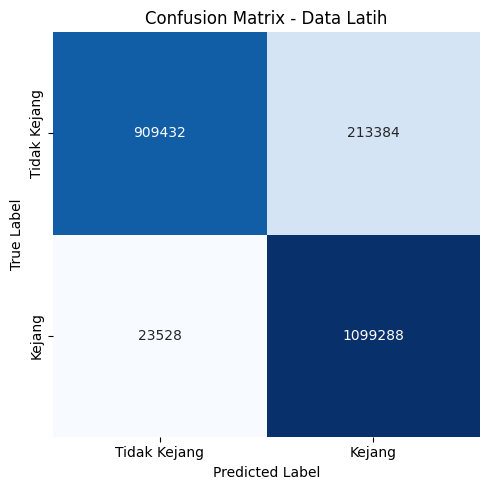

In [ ]:
# Prediksi data latih
y_train_pred = search_model.predict(X_train) #menghasilakn label prediksi dari fitur

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4)) # mengevaluasi seberapa baik prediksi dibanding label asli


# ====================
# Confusion Matrix - Data Latih
# ====================

cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9350    0.7895    0.8561    280704
tidak kejang     0.8179    0.9451    0.8769    280704

    accuracy                         0.8673    561408
   macro avg     0.8764    0.8673    0.8665    561408
weighted avg     0.8764    0.8673    0.8665    561408



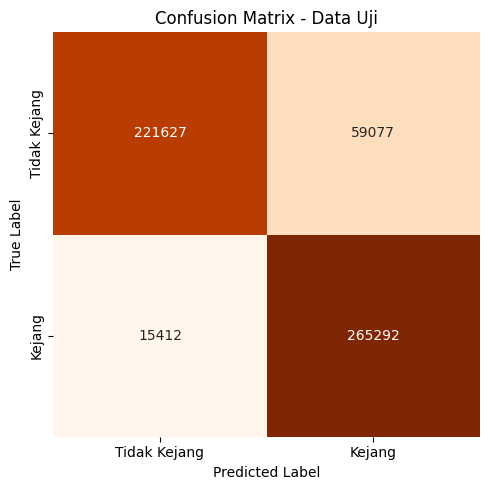

In [ ]:
#pediksi data test
y_test_pred = search_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================

cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# BLACKMAN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/BLACKMAN.csv")
mydata

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.003741,0.000385,0.000622,0.000638,0.002700,0.000573,0.000365,0.001750,0.002275,0.001656,...,0.001062,0.000140,0.001181,0.000622,0.000367,0.002299,2.116137e-04,0.002336,kejang,0.000000
1,0.003742,0.000385,0.000623,0.000638,0.002700,0.000573,0.000367,0.001751,0.002276,0.001656,...,0.001062,0.000141,0.001181,0.000623,0.000367,0.002300,2.127388e-04,0.002337,kejang,0.025000
2,0.003744,0.000384,0.000625,0.000640,0.002701,0.000573,0.000373,0.001754,0.002277,0.001657,...,0.001062,0.000142,0.001182,0.000625,0.000369,0.002301,2.163550e-04,0.002339,kejang,0.050000
3,0.003746,0.000383,0.000628,0.000641,0.002702,0.000573,0.000383,0.001759,0.002280,0.001659,...,0.001060,0.000144,0.001184,0.000628,0.000372,0.002303,2.232656e-04,0.002343,kejang,0.075000
4,0.003749,0.000381,0.000633,0.000644,0.002702,0.000572,0.000396,0.001766,0.002282,0.001662,...,0.001063,0.000146,0.001186,0.000633,0.000376,0.002304,2.311911e-04,0.002348,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505189e-06,0.000024,tidak kejang,127.926471
2807036,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.402577e-07,0.000016,tidak kejang,127.941176
2807037,0.000072,0.000075,0.000057,0.000143,0.000050,0.000401,0.000412,0.000113,0.000130,0.000010,...,0.000078,0.000017,0.000030,0.000057,0.000135,0.000008,3.505183e-06,0.000024,tidak kejang,127.955882
2807038,0.000143,0.000117,0.000066,0.000112,0.000072,0.000416,0.000493,0.000066,0.000174,0.000011,...,0.000111,0.000002,0.000057,0.000066,0.000125,0.000034,3.401537e-07,0.000016,tidak kejang,127.970588


In [ ]:
# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']

In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model/buat model dasar
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 20],
}

# Grid Search CV dengan cv=5/pencarian parameter
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model/cross validation/pembentukan pohon
search_model = grid_search.fit(X_train, y_train)


In [ ]:
search_model.best_params_

{'max_depth': 20, 'n_estimators': 100}

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9795    0.7868    0.8727   1122816
tidak kejang     0.8219    0.9836    0.8955   1122816

    accuracy                         0.8852   2245632
   macro avg     0.9007    0.8852    0.8841   2245632
weighted avg     0.9007    0.8852    0.8841   2245632



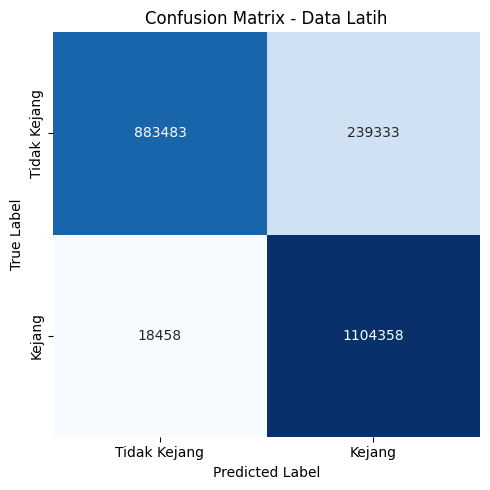

In [ ]:
# Prediksi data latih
y_train_pred = search_model.predict(X_train) #menghasilakn label prediksi dari fitur

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4)) # mengevaluasi seberapa baik prediksi dibanding label asli


# ====================
# Confusion Matrix - Data Latih
# ====================

cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9413    0.7688    0.8463    280704
tidak kejang     0.8046    0.9520    0.8721    280704

    accuracy                         0.8604    561408
   macro avg     0.8729    0.8604    0.8592    561408
weighted avg     0.8729    0.8604    0.8592    561408



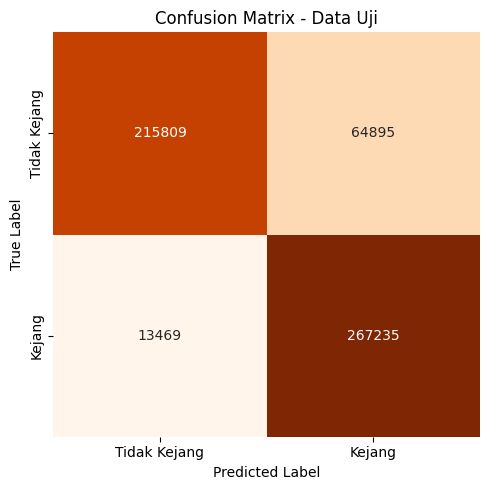

In [ ]:
#pediksi data test
y_test_pred = search_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================

cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()